In [18]:
import random
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import csv

text = ''
author = []
with open('poem.txt', 'r', encoding='utf-8') as file:
    text = file.read()


In [20]:
len(text)

529829

In [21]:
print(text[:1000])

يا مَوضِعَ الشَدَنِيَّةِ الوَجناءِ    وَمُصارِعَ الإِدلاجِ وَالإِسراءِأَقري السَلامَ مُعَرَّفاً وَمُحَصِّباً    مِن خالِدِ المَعروفِ وَالهَيجاءِسَيلٌ طَما لَو لَم يَذُدهُ ذائِدٌ    لَتَبَطَّحَت أولاهُ بِالبَطحاءِوَغَدَت بُطونُ مِنى مُنىً مِن سَيبِهِ    وَغَدَت حَرىً مِنهُ ظُهورُ حِراءِوَتَعَرَّفَت عَرَفاتُ زاخِرَهُ وَلَم    يُخصَص كَداءٌ مِنهُ بِالإِكداءِوَلَطابَ مُرتَبَعٌ بِطيبَةَ وَاِكتَسَت    بُردَينِ بُردَ ثَرىً وَبُردَ ثَراءِلا يُحرَمِ الحَرمَانِ خَيراً إِنَّهُم    حُرِموا بِهِ نَوءاً مِنَ الأَنواءِيا سائِلي عَن خالِدٍ وَفَعالِهِ    رِد فَاِغتَرِف عِلماً بِغَيرِ رَشاءِاُنظُر وَإِيّاكَ الهَوى لا تُمكِنَن    سُلطانَهُ مِن مُقلَةٍ شَوساءِتَعلَم كَمِ اِفتَرَعَت صُدورُ رِماحِهِ    وَسُيوفِهِ مِن بَلدَةٍ عَذراءِوَدَعا فَأَسمَعَ بِالأَسِنَّةِ وَاللُهى    صُمَّ العِدى في صَخرَةٍ صَمّاءِبِمَجامِعِ الثَغرَينِ ما يَنفَكُّ مِن    جَيشٍ أَزَبَّ وَغارَةٍ شَعواءِمِن كُلِّ فَرجٍ لِلعَدُوِّ كَأَنَّهُ    فَرجٌ حِمىً إِلّا مِنَ الأَكفاءِقَد كانَ خَطبٌ عاثِرٌ فَأَقالَهُ    رَأيُ الخَليفَةِ كَوكَبُ ال

In [22]:
print(set(text))

{'س', 'ج', 'ذ', 'ت', 'آ', 'ٌ', 'ل', 'ك', 'ض', 'ي', 'َ', 'ّ', 'ة', 'إ', 'ء', 'و', 'ً', 'ظ', 'ؤ', 'ف', 'ُ', 'ِ', 'ق', 'ى', 'ر', 'ح', 'ع', 'م', 'ش', 'ب', 'خ', 'ز', 'ث', 'ٍ', 'ص', 'د', 'ن', 'أ', 'ئ', 'ط', 'ا', 'غ', 'ه', ' '}


In [23]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 ءآأؤإئابةتثجحخدذرزسشصضطظعغفقكلمنهوىيًٌٍَُِّ
44


In [24]:
# create mapping from characters to integers

stoi = {ch:i for i, ch in enumerate(chars)}
itos = {i:ch for i, ch in enumerate(stoi)}
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

print(encode("كيف الاخبار"))
print(decode(encode("كيف الأخبار")))


[29, 36, 27, 0, 7, 30, 7, 14, 8, 7, 17]
كيف الأخبار


In [25]:
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:100])

torch.Size([529829]) torch.int64
tensor([36,  7,  0, 31, 40, 34, 22, 42, 25, 40,  0,  7, 30, 20, 40, 15, 40, 32,
        42, 36, 43, 40,  9, 42,  0,  7, 30, 34, 40, 12, 32,  7,  1, 42,  0,  0,
         0,  0, 34, 40, 31, 41, 21,  7, 17, 42, 25, 40,  0,  7, 30,  5, 42, 15,
        30,  7, 12, 42,  0, 34, 40,  7, 30,  5, 42, 19, 17,  7,  1, 42,  3, 40,
        28, 17, 36,  0,  7, 30, 19, 40, 30,  7, 31, 40,  0, 31, 41, 25, 40, 17,
        43, 40, 27,  7, 37,  0, 34, 40, 31, 41])


In [26]:
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

In [27]:
block_size = 8
train_data[:block_size+1]

tensor([36,  7,  0, 31, 40, 34, 22, 42, 25])

In [28]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when the input is {context} the target: {target}")

when the input is tensor([36]) the target: 7
when the input is tensor([36,  7]) the target: 0
when the input is tensor([36,  7,  0]) the target: 31
when the input is tensor([36,  7,  0, 31]) the target: 40
when the input is tensor([36,  7,  0, 31, 40]) the target: 34
when the input is tensor([36,  7,  0, 31, 40, 34]) the target: 22
when the input is tensor([36,  7,  0, 31, 40, 34, 22]) the target: 42
when the input is tensor([36,  7,  0, 31, 40, 34, 22, 42]) the target: 25


In [29]:
torch.manual_seed(1996)
batch_size = 4
block_size = 8

def get_batch(split):
    #generate a small batch of data of input x and target y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('target:')
print(yb.shape)
print(yb)

inputs:
torch.Size([4, 8])
tensor([[41, 25,  7, 34, 42, 15, 41, 33],
        [30, 42, 30, 43, 40, 33, 42,  0],
        [36, 17, 39,  0,  0,  0,  0, 34],
        [ 7, 34, 40,  5, 42, 16,  7,  0]])
target:
torch.Size([4, 8])
tensor([[25,  7, 34, 42, 15, 41, 33, 41],
        [42, 30, 43, 40, 33, 42,  0,  3],
        [17, 39,  0,  0,  0,  0, 34, 40],
        [34, 40,  5, 42, 16,  7,  0, 29]])


In [30]:
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1996)

class BiagramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):
        logits = self.token_embedding_table(idx)
        if targets == None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            logits, loss = self(idx)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return(idx)

m = BiagramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(loss.item())

3.94657826423645


In [31]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))

 هاازَبفظر ئيُوصثهٌءصظشًٌءحيزقلوّعٌءبهفشي رفمخنآآغإرِخ ِشثقهٌيمطٌراثثّدؤغ وضةةئيِنكئنبهّزىآلٍؤذًثآءدو


In [32]:
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-4)

In [48]:
batch_size = 32
lossi = []
for steps in range(10000):
    xb, yb = get_batch('train')

    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
    lossi.append(loss.item())
print(loss.item())

2.5069408416748047


In [47]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))

 خد نثلت ألطَلُطٍ كتَ   كمِفَعَن  صالِيرٌ شَهُ رَمُسّيِندِ يَّفي اجا لاها باِكَمَّبُ  فالَهُ قِلَ صَ 


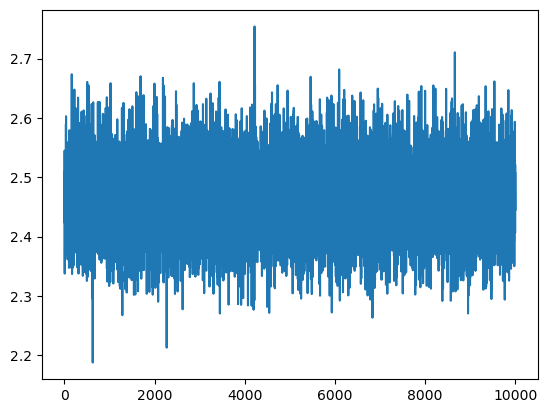

In [49]:
plt.plot(lossi)